# Car Price Prediction

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [2]:
# Import Dataset
car = pd.read_csv(r"C:\Users\aksha\Desktop\Internship\Oasis Infobyte\Car Price Prediction\CarPrice_Assignment.csv")

In [3]:
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data Preprocessing

In [4]:
# Check Data types and Information
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Describe Data and Statistics
car.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
# Check Null Values
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
car.shape

(205, 26)

In [8]:
# Check Duplicate Entry
car.duplicated().sum()

0

# Visualization

<AxesSubplot:xlabel='symboling', ylabel='Count'>

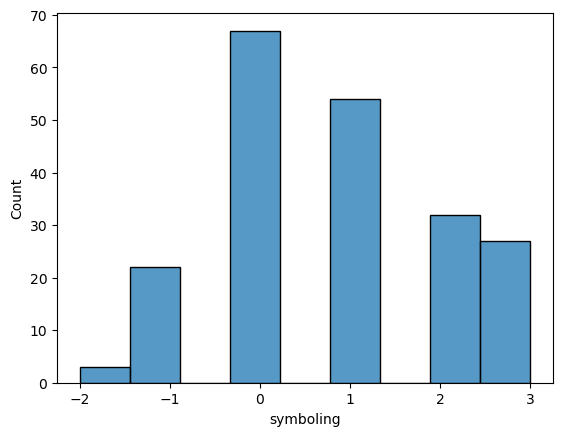

In [9]:
sns.histplot(car, x='symboling')

<AxesSubplot:xlabel='fueltype', ylabel='Count'>

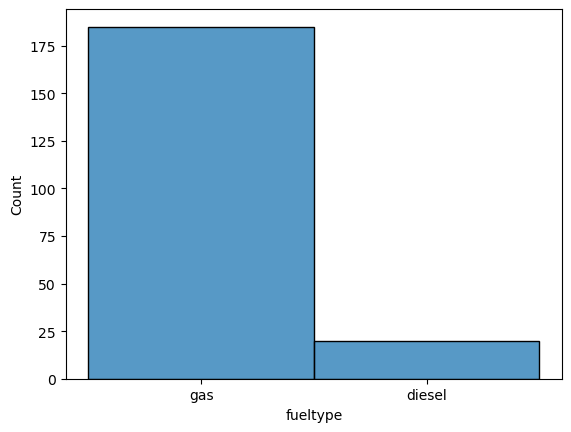

In [10]:
sns.histplot(car, x='fueltype')

<AxesSubplot:xlabel='aspiration', ylabel='Count'>

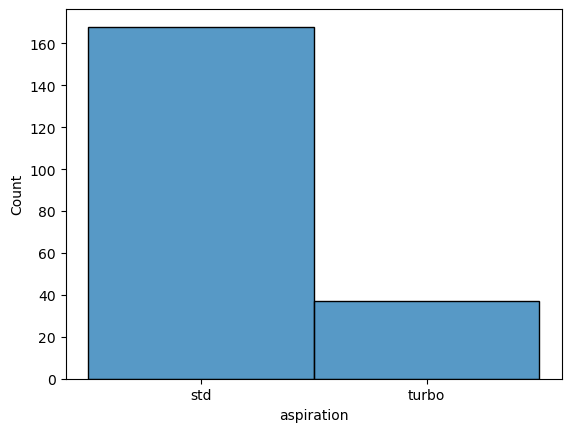

In [11]:
sns.histplot(car, x='aspiration')

<AxesSubplot:xlabel='doornumber', ylabel='Count'>

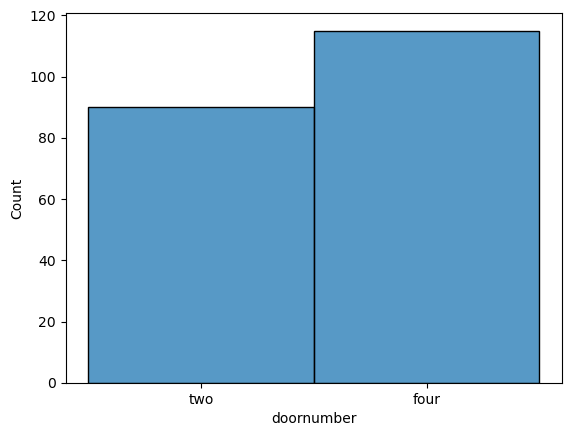

In [12]:
sns.histplot(car, x='doornumber')

<AxesSubplot:xlabel='carbody', ylabel='Count'>

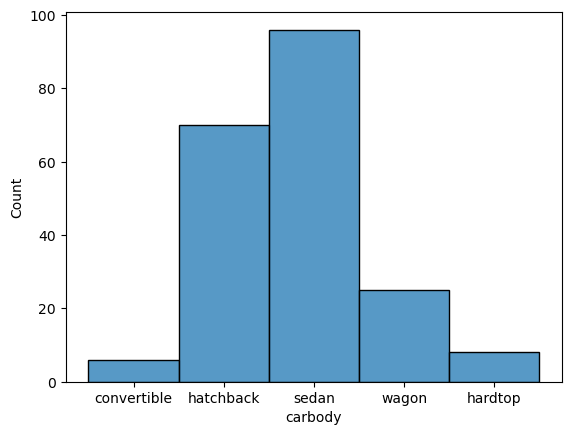

In [13]:
sns.histplot(car, x='carbody')

<AxesSubplot:xlabel='drivewheel', ylabel='Count'>

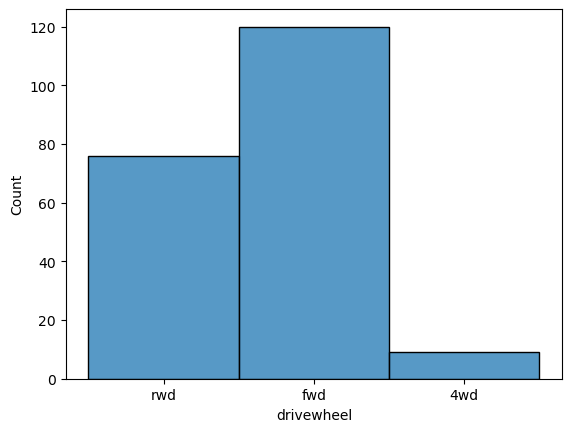

In [14]:
sns.histplot(car, x='drivewheel')

<AxesSubplot:xlabel='enginelocation', ylabel='Count'>

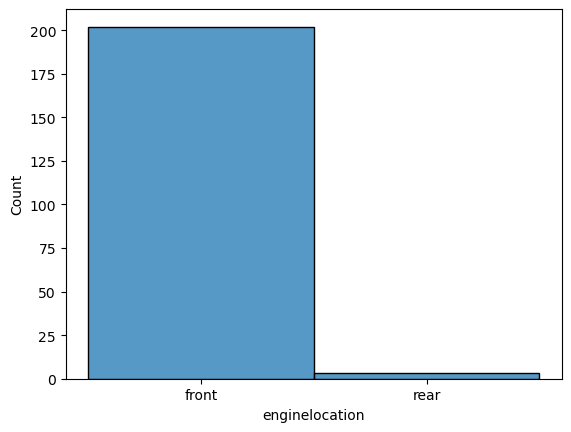

In [15]:
sns.histplot(car, x='enginelocation')

<AxesSubplot:xlabel='fuelsystem', ylabel='Count'>

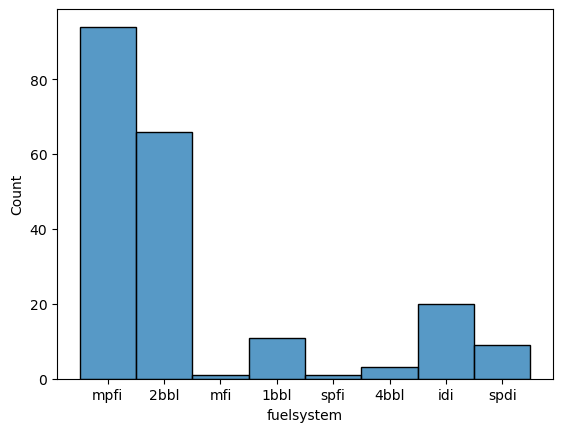

In [16]:
sns.histplot(car, x='fuelsystem')

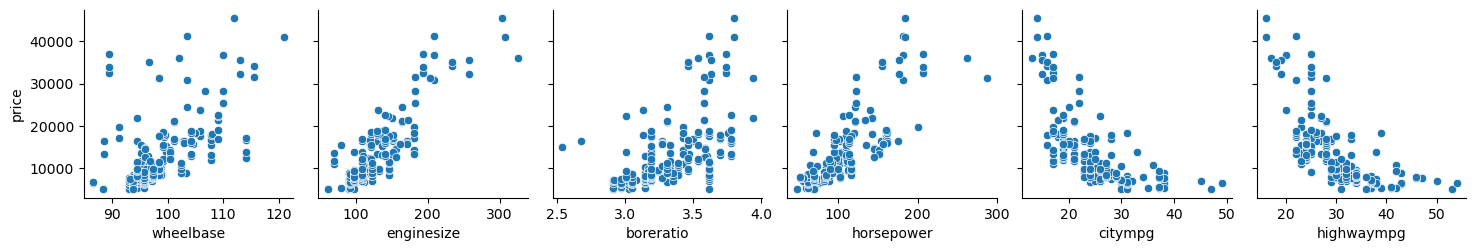

In [17]:
# Compare Price with wheelbase, enginesize, boreration, horsepower, citympg, highwaympg
sns.pairplot(car,x_vars=('wheelbase', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'),y_vars='price')

# Model Preprocessing

In [18]:
# Convert Categorical to Numerical Data
car['fueltype'] = car['fueltype'].map({'gas':1,'diesel':0})
car['aspiration'] = car['aspiration'].map({'std':1,'turbo':0})
car['doornumber'] = car['doornumber'].map({'two':1,'four':0})
car['drivewheel'] = car['drivewheel'].map({'4wd':2,'rwd':1,'fwd':0})
car['enginelocation'] = car['enginelocation'].map({'front':1,'rear':0})
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,1,convertible,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,1,convertible,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,1,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,0,sedan,0,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,0,sedan,2,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
# Using Dummy Methods are Convert Categorical to Numerical data
encoded_car = pd.get_dummies(car, columns = ['symboling', 'carbody', 'cylindernumber', 'enginetype', 'fuelsystem'])
encoded_car

,car_ID,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,alfa-romero giulia,1,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,2,alfa-romero stelvio,1,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,alfa-romero Quadrifoglio,1,1,1,1,1,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,4,audi 100 ls,1,1,0,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,5,audi 100ls,1,1,0,2,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),1,1,0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,202,volvo 144ea,1,0,0,1,1,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,203,volvo 244dl,1,1,0,1,1,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,204,volvo 246,0,0,0,1,1,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# Drop Uncertain Columns
encoded_car = encoded_car.drop(encoded_car.iloc[:,[0,1]], axis=1)
encoded_car

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,0,0,0,1,0,0
3,1,1,0,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,2,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,0,1,1,109.1,188.8,68.9,55.5,2952,...,0,0,0,0,0,0,0,1,0,0
201,1,0,0,1,1,109.1,188.8,68.8,55.5,3049,...,0,0,0,0,0,0,0,1,0,0
202,1,1,0,1,1,109.1,188.8,68.9,55.5,3012,...,1,0,0,0,0,0,0,1,0,0
203,0,0,0,1,1,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,0,1,0,0,0,0


In [21]:
encoded_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fueltype               205 non-null    int64  
 1   aspiration             205 non-null    int64  
 2   doornumber             205 non-null    int64  
 3   drivewheel             205 non-null    int64  
 4   enginelocation         205 non-null    int64  
 5   wheelbase              205 non-null    float64
 6   carlength              205 non-null    float64
 7   carwidth               205 non-null    float64
 8   carheight              205 non-null    float64
 9   curbweight             205 non-null    int64  
 10  enginesize             205 non-null    int64  
 11  boreratio              205 non-null    float64
 12  stroke                 205 non-null    float64
 13  compressionratio       205 non-null    float64
 14  horsepower             205 non-null    int64  
 15  peakrp

# Model Preparation

In [22]:
# Create Independent and Dependent Variable
X = encoded_car.drop('price',axis=1)
y = encoded_car.loc[:,'price']

In [23]:
# Spliting the Dataset for Traing and Testing data 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

# Linear Regression Model

In [24]:
# Build and Fit Linear Regression Model
regression = LinearRegression()
regression.fit(X_train,y_train)
regression_pred = regression.predict(X_test)
regression_pred

array([29039.46875, 21568.5    , 10882.71875, 13245.9375 , 26478.96875,
        5935.03125,  9593.5625 ,  8246.09375,  9633.78125,  8742.9375 ,
       17615.875  ,  7058.65625, 19051.78125,  8303.71875, 46271.03125,
        7068.65625, -5365.71875, 13848.     , 11108.65625, 10876.78125,
       11285.46875, 17831.25   ,  3641.34375,   637.6875 ,  7668.46875,
       29236.6875 , 11485.1875 , 15940.5625 ,  4814.78125, 16513.625  ,
       26901.78125,  6756.71875,  7046.34375, 18520.75   ,  7924.9375 ,
       26053.375  , 13420.78125, 12735.84375,  6900.84375, 14242.5    ,
        6815.84375])

In [25]:
# Check Evalution Metrices Error
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=regression_pred))
mape = mean_absolute_percentage_error(y_true=y_test, y_pred=regression_pred)
Adj_sqaure = r2_score(y_true=y_test, y_pred=regression_pred)
print('RMSE :', rmse)
print('MAPE :', mape)
print('Adj Square :', Adj_sqaure)

RMSE : 3478.571198647621
MAPE : 0.2342755309021707
Adj Square : 0.8467210379047364


# Random Forest Regressor Model

In [26]:
# Build and fit Random Forest Regressor Model
RForest = RandomForestRegressor()
RForest.fit(X_train , y_train)
RForest_pred = RForest.predict(X_test)
RForest_pred

array([35923.255     , 18374.74      ,  8899.85      , 13616.15916667,
       26624.035     ,  6687.73      ,  7746.39      ,  7991.69      ,
       10680.22      ,  8061.23      , 15070.7325    ,  7870.52      ,
       14809.99      , 11022.42333333, 39438.34      ,  6514.81      ,
        5717.91      , 14142.89      ,  8346.52166667,  9935.27666667,
       10370.74      , 14897.45      ,  7236.68      ,  5851.775     ,
        7228.82      , 35910.095     ,  9367.455     , 16540.2575    ,
        7245.71      , 16003.94      , 26913.405     ,  6432.17      ,
        7791.57333333, 18333.335     ,  8078.54      , 26819.665     ,
       11609.29      , 12518.3       ,  7500.055     , 14689.55      ,
        8584.28333333])

In [27]:
# Check Evalution Metrices Error
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=RForest_pred))
mape = mean_absolute_percentage_error(y_true=y_test, y_pred=RForest_pred)
Adj_sqaure = r2_score(y_true=y_test, y_pred=RForest_pred)
print('RMSE :', rmse)
print('MAPE :', mape)
print('Adj Square :', Adj_sqaure)

RMSE : 1804.6926792618308
MAPE : 0.09254084879335006
Adj Square : 0.958743985544566
